In [1]:
 # Importing the libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [2]:
# Load the  PROBLEM dataset
ccdata= pd.read_csv(r"C:\Users\hp\data52\clean_dataset.csv" ,header=0)

# Copy to back-uo file

ccdata_bk= ccdata.copy()

# Display first 5 records

ccdata.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [3]:
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 86.4+ KB


In [4]:
 #display the unique values of all variables

ccdata.nunique()

Gender              2
Age               350
Debt              215
Married             2
BankCustomer        2
Industry           14
Ethnicity           5
YearsEmployed     132
PriorDefault        2
Employed            2
CreditScore        23
DriversLicense      2
Citizen             3
ZipCode           170
Income            240
Approved            2
dtype: int64

In [5]:
# display the null values in the dataset by count in each variable

ccdata.isnull().sum()

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [6]:
ccdata.duplicated().any()

False

In [7]:
#display the datatypes of variables

ccdata.dtypes

Gender              int64
Age               float64
Debt              float64
Married             int64
BankCustomer        int64
Industry           object
Ethnicity          object
YearsEmployed     float64
PriorDefault        int64
Employed            int64
CreditScore         int64
DriversLicense      int64
Citizen            object
ZipCode             int64
Income              int64
Approved            int64
dtype: object

In [8]:
#identify the numerical and categorical variables

num_vars=ccdata.columns[ccdata.dtypes !='object']
cat_vars = ccdata.columns[ccdata.dtypes =='object']
print(num_vars)
print(cat_vars)

Index(['Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'YearsEmployed',
       'PriorDefault', 'Employed', 'CreditScore', 'DriversLicense', 'ZipCode',
       'Income', 'Approved'],
      dtype='object')
Index(['Industry', 'Ethnicity', 'Citizen'], dtype='object')


In [9]:
ccdata01= pd.read_csv(r"C:\Users\hp\data52\clean_dataset.csv" ,header=0)

# Copy to back-uo file

ccdata01_bk=ccdata01.copy()

ccdata01.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30.83,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58.67,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24.50,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27.83,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20.17,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1


In [10]:
#convert float to integer value of 'Driver_Age' amnd 'Policy_Num'

ccdata['Age'] = ccdata['Age'].astype(int)

#display the Claims data

ccdata

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,1,30,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,202,0,1
1,0,58,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,43,560,1
2,0,24,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,280,824,1
3,1,27,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,100,3,1
4,1,20,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,120,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,21,10.085,0,0,Education,Black,1.25,0,0,0,0,ByBirth,260,0,0
686,0,22,0.750,1,1,Energy,White,2.00,0,1,2,1,ByBirth,200,394,0
687,0,25,13.500,0,0,Healthcare,Latino,2.00,0,1,1,1,ByBirth,200,1,0
688,1,17,0.205,1,1,ConsumerStaples,White,0.04,0,0,0,0,ByBirth,280,750,0


In [11]:
# Count the target or dependent variable by '0' & '1' and their proportion 
# (>= 10 : 1, then the dataset is imbalance data)

Approved_count=ccdata.Approved.value_counts()
print('Class 0:', Approved_count[0])
print('Class 1:', Approved_count[1])
print('Proportion:', round(Approved_count[0] / Approved_count[1], 2), ': 1')
print('Total records:', len(ccdata))

Class 0: 383
Class 1: 307
Proportion: 1.25 : 1
Total records: 690


In [12]:
#delete the variables which are not influencing the target variable and display first 5 records

del ccdata['ZipCode']

ccdata.head()

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,Income,Approved
0,1,30,0.000,1,1,Industrials,White,1.25,1,1,1,0,ByBirth,0,1
1,0,58,4.460,1,1,Materials,Black,3.04,1,1,6,0,ByBirth,560,1
2,0,24,0.500,1,1,Materials,Black,1.50,1,0,0,0,ByBirth,824,1
3,1,27,1.540,1,1,Industrials,White,3.75,1,1,5,1,ByBirth,3,1
4,1,20,5.625,1,1,Industrials,White,1.71,1,0,0,0,ByOtherMeans,0,1


In [13]:
#replace 'Industry' variable and convert to integer value

ccdata['Industry']=ccdata['Industry'].str.replace('Industrials','0')
ccdata['Industry']=ccdata['Industry'].str.replace('Materials','1')
ccdata['Industry']=ccdata['Industry'].str.replace('CommunicationServices','2')
ccdata['Industry']=ccdata['Industry'].str.replace('Transport','3')
ccdata['Industry']=ccdata['Industry'].str.replace('InformationTechnology','4')
ccdata['Industry']=ccdata['Industry'].str.replace('Financials','5')
ccdata['Industry']=ccdata['Industry'].str.replace('Energy','6')
ccdata['Industry']=ccdata['Industry'].str.replace('Real Estate','7')
ccdata['Industry']=ccdata['Industry'].str.replace('Utilities','8')
ccdata['Industry']=ccdata['Industry'].str.replace('ConsumerDiscretionary','9')
ccdata['Industry']=ccdata['Industry'].str.replace('Education','10')
ccdata['Industry']=ccdata['Industry'].str.replace('ConsumerStaples','11')
ccdata['Industry']=ccdata['Industry'].str.replace('Healthcare','12')
ccdata['Industry']=ccdata['Industry'].str.replace('Research','13')
ccdata['Industry']=ccdata['Industry'].astype(int)


In [14]:
ccdata['Ethnicity']=ccdata['Ethnicity'].str.replace('White','0')
ccdata['Ethnicity']=ccdata['Ethnicity'].str.replace('Black','1')
ccdata['Ethnicity']=ccdata['Ethnicity'].str.replace('Asian','2')
ccdata['Ethnicity']=ccdata['Ethnicity'].str.replace('Latino','3')
ccdata['Ethnicity']=ccdata['Ethnicity'].str.replace('Other','4')
ccdata['Ethnicity']=ccdata['Ethnicity'].astype(int)        

In [15]:
ccdata['Citizen']=ccdata['Citizen'].str.replace('ByBirth','0')
ccdata['Citizen']=ccdata['Citizen'].str.replace('ByOtherMeans','1')
ccdata['Citizen']=ccdata['Citizen'].str.replace('Temporary','2')
ccdata['Citizen']=ccdata['Citizen'].astype(int)        


In [16]:
#identify the independent and target (dependent) variables

IndepVar =[]
for col in ccdata.columns:
    if col !='Approved':
        IndepVar.append(col)
        
TargetVar='Approved'

x=ccdata[IndepVar]
y=ccdata[TargetVar]

In [17]:
#split the data into train and test (random sampling)

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

#display the shape for train &test data

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((483, 14), (207, 14), (483,), (207,))

In [18]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
#x_train[cols] = mmscaler.fit_transform(x_train[cols])
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
#x_test[cols] = mmscaler.fit_transform(x_test[cols])
x_test = pd.DataFrame(x_test)

# classification models-KNN MODEL

In [19]:
#load the result dataset for knn

KNN_Results= pd.read_csv(r"C:\Users\hp\data52\KNN_Results.csv" ,header=0)
KNN_Results.head()

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


Model Name:  LogisticRegression()
Confusion matrix : 
 [[87 10]
 [23 87]]
Outcome values : 
 87 10 23 87
Classification report : 
               precision    recall  f1-score   support

           1       0.79      0.90      0.84        97
           0       0.90      0.79      0.84       110

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.85      0.84      0.84       207

Accuracy : 84.1 %
Precision : 79.1 %
Recall : 89.7 %
F1 Score : 0.841
Specificity or True Negative Rate : 79.1 %
Balanced Accuracy : 84.4 %
MCC : 0.688
roc_auc_score: 0.844


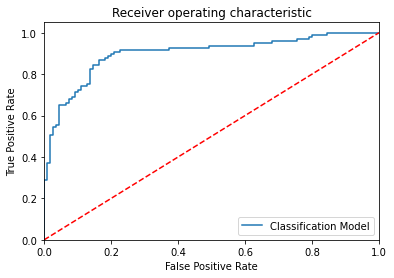

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[ 77  20]
 [ 10 100]]
Outcome values : 
 77 20 10 100
Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.79      0.84        97
           0       0.83      0.91      0.87       110

    accuracy                           0.86       207
   macro avg       0.86      0.85      0.85       207
weighted avg       0.86      0.86      0.85       207

Accuracy : 85.5 %
Precision : 88.5 %
Recall : 79.4 %
F1 Score : 0.837
Specificity or True Negative Rate : 90.9 %
Balanced Accuracy : 85.2 %
MCC : 0.711
roc_auc_score: 0.851


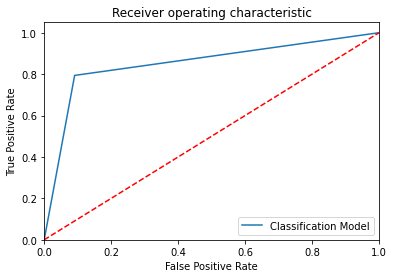

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[78 19]
 [11 99]]
Outcome values : 
 78 19 11 99
Classification report : 
               precision    recall  f1-score   support

           1       0.88      0.80      0.84        97
           0       0.84      0.90      0.87       110

    accuracy                           0.86       207
   macro avg       0.86      0.85      0.85       207
weighted avg       0.86      0.86      0.85       207

Accuracy : 85.5 %
Precision : 87.6 %
Recall : 80.4 %
F1 Score : 0.839
Specificity or True Negative Rate : 90.0 %
Balanced Accuracy : 85.2 %
MCC : 0.71
roc_auc_score: 0.852


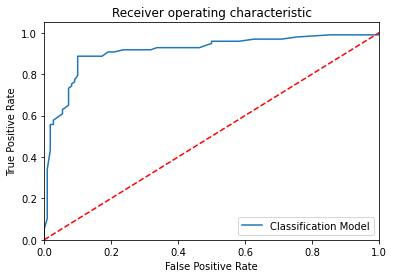

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[80 17]
 [15 95]]
Outcome values : 
 80 17 15 95
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.82      0.83        97
           0       0.85      0.86      0.86       110

    accuracy                           0.85       207
   macro avg       0.85      0.84      0.84       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 84.5 %
Precision : 84.2 %
Recall : 82.5 %
F1 Score : 0.833
Specificity or True Negative Rate : 86.4 %
Balanced Accuracy : 84.4 %
MCC : 0.689
roc_auc_score: 0.844


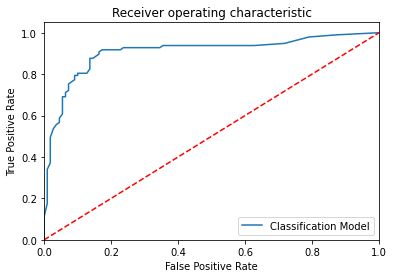

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[83 14]
 [15 95]]
Outcome values : 
 83 14 15 95
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.86      0.85        97
           0       0.87      0.86      0.87       110

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 86.0 %
Precision : 84.7 %
Recall : 85.6 %
F1 Score : 0.851
Specificity or True Negative Rate : 86.4 %
Balanced Accuracy : 86.0 %
MCC : 0.719
roc_auc_score: 0.86


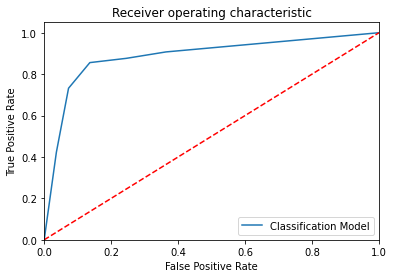

-----------------------------------------------------------------------------------------------------


In [20]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

# Create objects of classification algorithms with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
#ModelGNB = GaussianNB()
#ModelSVM = SVC(probability=True)

# Evalution matrix for all the algorithms

#MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGNB, ModelSVM]
MM = [ModelLR, ModelDC, ModelRF, ModelET,ModelKNN]
for models in MM:
            
    # Train the model training dataset
    
    models.fit(x_train, y_train)
    
    # Prediction the model with test dataset
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    Model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, models.predict_proba(x_test)[:,1])
    plt.figure()
    #
    plt.plot(fpr, tpr, label= 'Classification Model' % Model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    print('-----------------------------------------------------------------------------------------------------')
    #----------------------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'True_Positive': tp,
               'False_Negative': fn, 
               'False_Positive': fp, 
               'True_Negative': tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #----------------------------------------------------------------------------------------------------------
#======================================================================================================================>




# knn

KNN_K_value =  1
Model Name:  KNeighborsClassifier(n_neighbors=1)
Confusion matrix : 
 [[70 27]
 [16 94]]
Outcome values : 
 70 27 16 94
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.72      0.77        97
           0       0.78      0.85      0.81       110

    accuracy                           0.79       207
   macro avg       0.80      0.79      0.79       207
weighted avg       0.79      0.79      0.79       207

Accuracy : 79.2 %
Precision : 81.4 %
Recall : 72.2 %
F1 Score : 0.765
Specificity or True Negative Rate : 85.5 %
Balanced Accuracy : 78.8 %
MCC : 0.583
roc_auc_score: 0.788


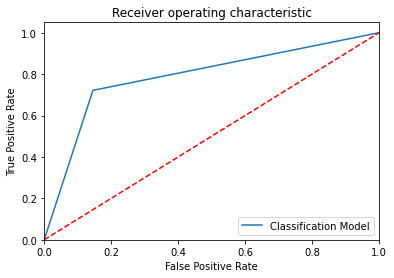

KNN_K_value =  2
Model Name:  KNeighborsClassifier(n_neighbors=2)
Confusion matrix : 
 [[ 63  34]
 [ 10 100]]
Outcome values : 
 63 34 10 100
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.65      0.74        97
           0       0.75      0.91      0.82       110

    accuracy                           0.79       207
   macro avg       0.80      0.78      0.78       207
weighted avg       0.80      0.79      0.78       207

Accuracy : 78.7 %
Precision : 86.3 %
Recall : 64.9 %
F1 Score : 0.741
Specificity or True Negative Rate : 90.9 %
Balanced Accuracy : 77.9 %
MCC : 0.583
roc_auc_score: 0.779


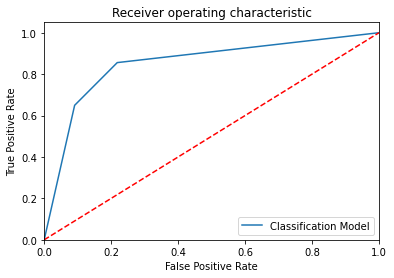

KNN_K_value =  3
Model Name:  KNeighborsClassifier(n_neighbors=3)
Confusion matrix : 
 [[81 16]
 [17 93]]
Outcome values : 
 81 16 17 93
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.84      0.83        97
           0       0.85      0.85      0.85       110

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207

Accuracy : 84.1 %
Precision : 82.7 %
Recall : 83.5 %
F1 Score : 0.831
Specificity or True Negative Rate : 84.5 %
Balanced Accuracy : 84.0 %
MCC : 0.68
roc_auc_score: 0.84


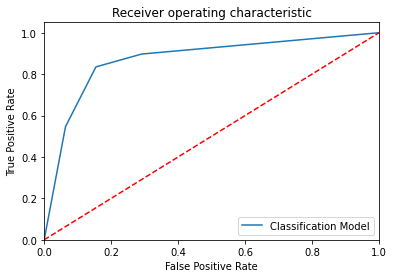

KNN_K_value =  4
Model Name:  KNeighborsClassifier(n_neighbors=4)
Confusion matrix : 
 [[77 20]
 [13 97]]
Outcome values : 
 77 20 13 97
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.79      0.82        97
           0       0.83      0.88      0.85       110

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207

Accuracy : 84.1 %
Precision : 85.6 %
Recall : 79.4 %
F1 Score : 0.824
Specificity or True Negative Rate : 88.2 %
Balanced Accuracy : 83.8 %
MCC : 0.68
roc_auc_score: 0.838


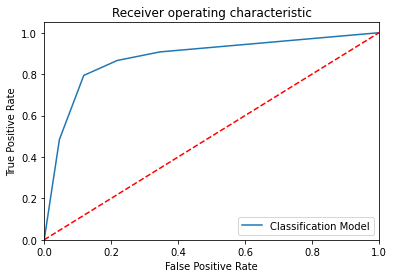

KNN_K_value =  5
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[83 14]
 [15 95]]
Outcome values : 
 83 14 15 95
Classification report : 
               precision    recall  f1-score   support

           1       0.85      0.86      0.85        97
           0       0.87      0.86      0.87       110

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 86.0 %
Precision : 84.7 %
Recall : 85.6 %
F1 Score : 0.851
Specificity or True Negative Rate : 86.4 %
Balanced Accuracy : 86.0 %
MCC : 0.719
roc_auc_score: 0.86


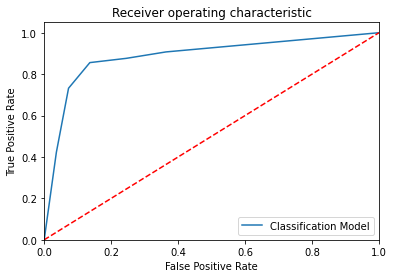

KNN_K_value =  6
Model Name:  KNeighborsClassifier(n_neighbors=6)
Confusion matrix : 
 [[82 15]
 [13 97]]
Outcome values : 
 82 15 13 97
Classification report : 
               precision    recall  f1-score   support

           1       0.86      0.85      0.85        97
           0       0.87      0.88      0.87       110

    accuracy                           0.86       207
   macro avg       0.86      0.86      0.86       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 86.5 %
Precision : 86.3 %
Recall : 84.5 %
F1 Score : 0.854
Specificity or True Negative Rate : 88.2 %
Balanced Accuracy : 86.3 %
MCC : 0.728
roc_auc_score: 0.864


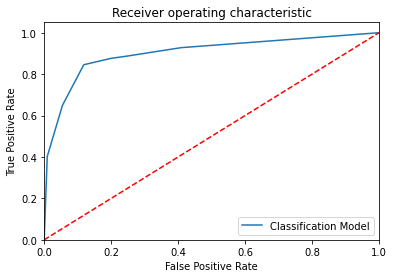

KNN_K_value =  7
Model Name:  KNeighborsClassifier(n_neighbors=7)
Confusion matrix : 
 [[84 13]
 [18 92]]
Outcome values : 
 84 13 18 92
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.87      0.84        97
           0       0.88      0.84      0.86       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 85.0 %
Precision : 82.4 %
Recall : 86.6 %
F1 Score : 0.844
Specificity or True Negative Rate : 83.6 %
Balanced Accuracy : 85.1 %
MCC : 0.701
roc_auc_score: 0.851


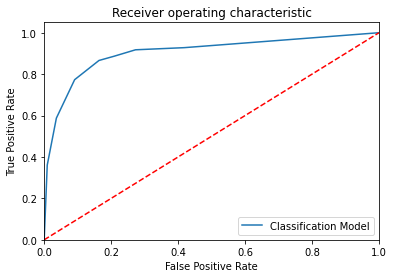

KNN_K_value =  8
Model Name:  KNeighborsClassifier(n_neighbors=8)
Confusion matrix : 
 [[82 15]
 [16 94]]
Outcome values : 
 82 15 16 94
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.85      0.84        97
           0       0.86      0.85      0.86       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 85.0 %
Precision : 83.7 %
Recall : 84.5 %
F1 Score : 0.841
Specificity or True Negative Rate : 85.5 %
Balanced Accuracy : 85.0 %
MCC : 0.7
roc_auc_score: 0.85


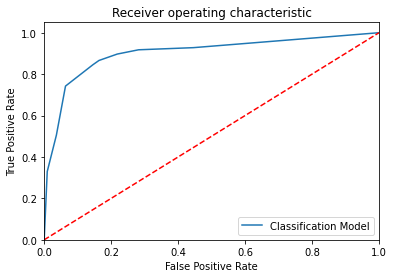

KNN_K_value =  9
Model Name:  KNeighborsClassifier(n_neighbors=9)
Confusion matrix : 
 [[84 13]
 [17 93]]
Outcome values : 
 84 13 17 93
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.87      0.85        97
           0       0.88      0.85      0.86       110

    accuracy                           0.86       207
   macro avg       0.85      0.86      0.85       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 85.5 %
Precision : 83.2 %
Recall : 86.6 %
F1 Score : 0.848
Specificity or True Negative Rate : 84.5 %
Balanced Accuracy : 85.5 %
MCC : 0.71
roc_auc_score: 0.856


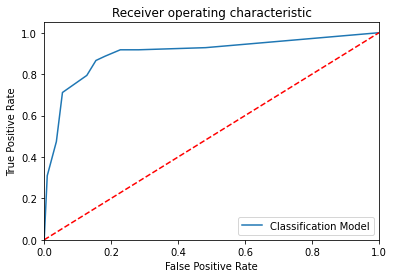

KNN_K_value =  10
Model Name:  KNeighborsClassifier(n_neighbors=10)
Confusion matrix : 
 [[83 14]
 [16 94]]
Outcome values : 
 83 14 16 94
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.86      0.85        97
           0       0.87      0.85      0.86       110

    accuracy                           0.86       207
   macro avg       0.85      0.86      0.85       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 85.5 %
Precision : 83.8 %
Recall : 85.6 %
F1 Score : 0.847
Specificity or True Negative Rate : 85.5 %
Balanced Accuracy : 85.5 %
MCC : 0.709
roc_auc_score: 0.855


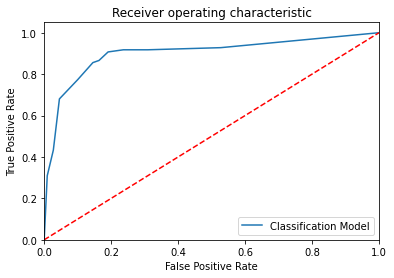

KNN_K_value =  11
Model Name:  KNeighborsClassifier(n_neighbors=11)
Confusion matrix : 
 [[84 13]
 [18 92]]
Outcome values : 
 84 13 18 92
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.87      0.84        97
           0       0.88      0.84      0.86       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 85.0 %
Precision : 82.4 %
Recall : 86.6 %
F1 Score : 0.844
Specificity or True Negative Rate : 83.6 %
Balanced Accuracy : 85.1 %
MCC : 0.701
roc_auc_score: 0.851


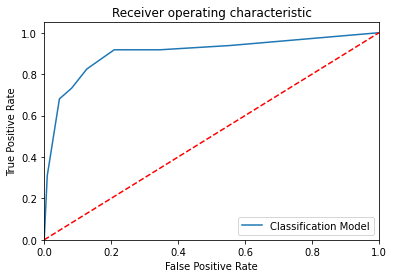

KNN_K_value =  12
Model Name:  KNeighborsClassifier(n_neighbors=12)
Confusion matrix : 
 [[84 13]
 [17 93]]
Outcome values : 
 84 13 17 93
Classification report : 
               precision    recall  f1-score   support

           1       0.83      0.87      0.85        97
           0       0.88      0.85      0.86       110

    accuracy                           0.86       207
   macro avg       0.85      0.86      0.85       207
weighted avg       0.86      0.86      0.86       207

Accuracy : 85.5 %
Precision : 83.2 %
Recall : 86.6 %
F1 Score : 0.848
Specificity or True Negative Rate : 84.5 %
Balanced Accuracy : 85.5 %
MCC : 0.71
roc_auc_score: 0.856


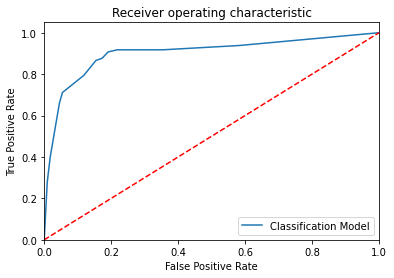

KNN_K_value =  13
Model Name:  KNeighborsClassifier(n_neighbors=13)
Confusion matrix : 
 [[85 12]
 [19 91]]
Outcome values : 
 85 12 19 91
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.88      0.85        97
           0       0.88      0.83      0.85       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 85.0 %
Precision : 81.7 %
Recall : 87.6 %
F1 Score : 0.846
Specificity or True Negative Rate : 82.7 %
Balanced Accuracy : 85.1 %
MCC : 0.702
roc_auc_score: 0.852


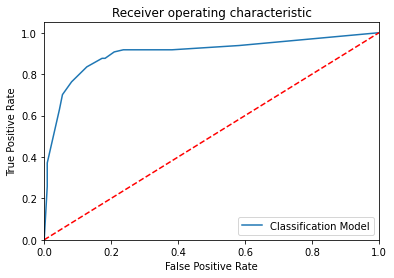

KNN_K_value =  14
Model Name:  KNeighborsClassifier(n_neighbors=14)
Confusion matrix : 
 [[84 13]
 [19 91]]
Outcome values : 
 84 13 19 91
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.87      0.84        97
           0       0.88      0.83      0.85       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 84.5 %
Precision : 81.6 %
Recall : 86.6 %
F1 Score : 0.84
Specificity or True Negative Rate : 82.7 %
Balanced Accuracy : 84.6 %
MCC : 0.692
roc_auc_score: 0.847


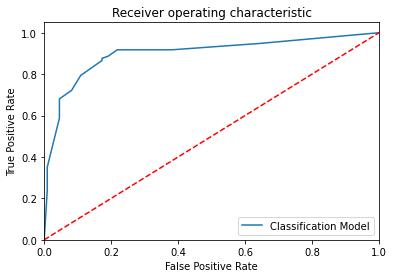

KNN_K_value =  15
Model Name:  KNeighborsClassifier(n_neighbors=15)
Confusion matrix : 
 [[85 12]
 [19 91]]
Outcome values : 
 85 12 19 91
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.88      0.85        97
           0       0.88      0.83      0.85       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 85.0 %
Precision : 81.7 %
Recall : 87.6 %
F1 Score : 0.846
Specificity or True Negative Rate : 82.7 %
Balanced Accuracy : 85.1 %
MCC : 0.702
roc_auc_score: 0.852


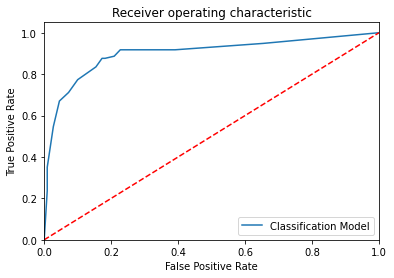

KNN_K_value =  16
Model Name:  KNeighborsClassifier(n_neighbors=16)
Confusion matrix : 
 [[84 13]
 [19 91]]
Outcome values : 
 84 13 19 91
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.87      0.84        97
           0       0.88      0.83      0.85       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 84.5 %
Precision : 81.6 %
Recall : 86.6 %
F1 Score : 0.84
Specificity or True Negative Rate : 82.7 %
Balanced Accuracy : 84.6 %
MCC : 0.692
roc_auc_score: 0.847


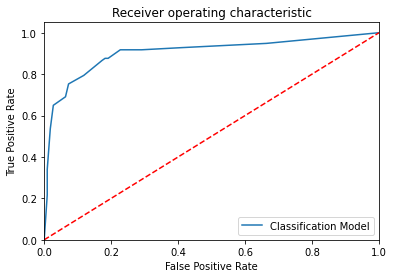

KNN_K_value =  17
Model Name:  KNeighborsClassifier(n_neighbors=17)
Confusion matrix : 
 [[85 12]
 [20 90]]
Outcome values : 
 85 12 20 90
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.88      0.84        97
           0       0.88      0.82      0.85       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 84.5 %
Precision : 81.0 %
Recall : 87.6 %
F1 Score : 0.842
Specificity or True Negative Rate : 81.8 %
Balanced Accuracy : 84.7 %
MCC : 0.693
roc_auc_score: 0.847


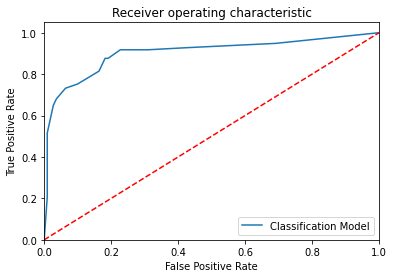

KNN_K_value =  18
Model Name:  KNeighborsClassifier(n_neighbors=18)
Confusion matrix : 
 [[84 13]
 [20 90]]
Outcome values : 
 84 13 20 90
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.87      0.84        97
           0       0.87      0.82      0.85       110

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207

Accuracy : 84.1 %
Precision : 80.8 %
Recall : 86.6 %
F1 Score : 0.836
Specificity or True Negative Rate : 81.8 %
Balanced Accuracy : 84.2 %
MCC : 0.683
roc_auc_score: 0.842


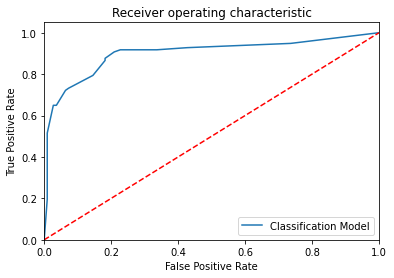

KNN_K_value =  19
Model Name:  KNeighborsClassifier(n_neighbors=19)
Confusion matrix : 
 [[85 12]
 [20 90]]
Outcome values : 
 85 12 20 90
Classification report : 
               precision    recall  f1-score   support

           1       0.81      0.88      0.84        97
           0       0.88      0.82      0.85       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 84.5 %
Precision : 81.0 %
Recall : 87.6 %
F1 Score : 0.842
Specificity or True Negative Rate : 81.8 %
Balanced Accuracy : 84.7 %
MCC : 0.693
roc_auc_score: 0.847


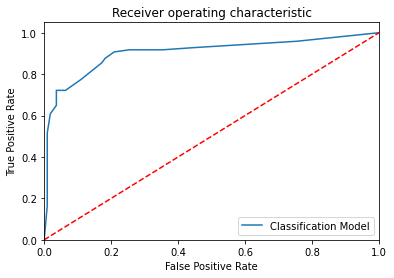

KNN_K_value =  20
Model Name:  KNeighborsClassifier(n_neighbors=20)
Confusion matrix : 
 [[84 13]
 [19 91]]
Outcome values : 
 84 13 19 91
Classification report : 
               precision    recall  f1-score   support

           1       0.82      0.87      0.84        97
           0       0.88      0.83      0.85       110

    accuracy                           0.85       207
   macro avg       0.85      0.85      0.85       207
weighted avg       0.85      0.85      0.85       207

Accuracy : 84.5 %
Precision : 81.6 %
Recall : 86.6 %
F1 Score : 0.84
Specificity or True Negative Rate : 82.7 %
Balanced Accuracy : 84.6 %
MCC : 0.692
roc_auc_score: 0.847


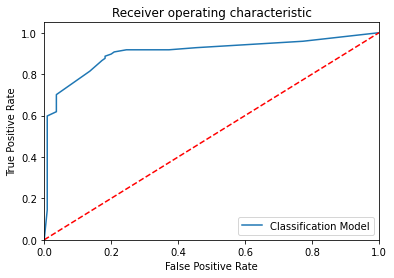

In [24]:

# Bild KNN Model

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.metrics as metrics

from sklearn.metrics import roc_curve, roc_auc_score

accuracy = []

for a in range(1, 21, 1):
    
    k = a
    
    # Build the model
    
    ModelKNN = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    
    ModelKNN.fit(x_train, y_train)
    
    # Predict the model
    
    y_pred = ModelKNN.predict(x_test)
    y_pred_prob = ModelKNN.predict_proba(x_test)
    
    print('KNN_K_value = ', a)
    
    # Print the model name
    
    print('Model Name: ', ModelKNN)
    
    # confusion matrix in sklearn
    
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    
    # actual values
    
    actual = y_test
    
    # predicted values
    
    predicted = y_pred
    
    # confusion matrix
    
    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)
    
    # outcome values order in sklearn
    
    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)
    
    # classification report for precision, recall f1-score and accuracy
    
    C_Report = classification_report(actual,predicted,labels=[1,0])
    
    print('Classification report : \n', C_Report)
    
    # calculating the metrics
    
    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);
    
    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model
    
    from math import sqrt
    
    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)
    
    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)
    
    # Area under ROC curve 
    
    from sklearn.metrics import roc_curve, roc_auc_score
    
    print('roc_auc_score:', round(roc_auc_score(actual, predicted), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    model_roc_auc = roc_auc_score(actual, predicted)
    fpr, tpr, thresholds = roc_curve(actual, ModelKNN.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % model_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    #------------------------------------------------------------------------------
    new_row = {'Model Name' : ModelKNN,
               'KNN K Value' : a,
               'True_Positive' : tp,
               'False_Negative' : fn,
               'False_Positive' : fp,
               'True_Negative' : tn,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(actual, predicted),
               'Balanced Accuracy':balanced_accuracy}
    KNN_Results = KNN_Results.append(new_row, ignore_index=True)
    #------KNN_Results------------------------------------------------------------------------




In [25]:
#RESULTS with comparing to all algo

KNN_Results.head(10)

,Model Name,KNN K Value,True_Positive,False_Negative,False_Positive,True_Negative,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),NaN,87,10,23,87,0.841,0.791,0.897,0.841,0.791,0.688,0.843908,0.844
1,DecisionTreeClassifier(),NaN,77,20,10,100,0.855,0.885,0.794,0.837,0.909,0.711,0.851453,0.852
2,"(DecisionTreeClassifier(max_features='auto', r...",NaN,78,19,11,99,0.855,0.876,0.804,0.839,0.9,0.71,0.852062,0.852
3,"(ExtraTreeClassifier(random_state=482355925), ...",NaN,80,17,15,95,0.845,0.842,0.825,0.833,0.864,0.689,0.844189,0.844
4,KNeighborsClassifier(),NaN,83,14,15,95,0.86,0.847,0.856,0.851,0.864,0.719,0.859653,0.86
5,KNeighborsClassifier(n_neighbors=1),1,70,27,16,94,0.792,0.814,0.722,0.765,0.855,0.583,0.788097,0.788
6,KNeighborsClassifier(n_neighbors=2),2,63,34,10,100,0.787,0.863,0.649,0.741,0.909,0.583,0.779288,0.779
7,KNeighborsClassifier(n_neighbors=3),3,81,16,17,93,0.841,0.827,0.835,0.831,0.845,0.68,0.840253,0.84
8,KNeighborsClassifier(n_neighbors=4),4,77,20,13,97,0.841,0.856,0.794,0.824,0.882,0.68,0.837816,0.838
9,KNeighborsClassifier(),5,83,14,15,95,0.86,0.847,0.856,0.851,0.864,0.719,0.859653,0.86


In [26]:
#PREDICT the values with KNN algorithm

y_predKNN=ModelKNN.predict(x_test)

In [27]:
#display the final results

Results =pd.DataFrame({'Approved_A':y_test,'Approved_P':y_pred})

#merge two Dataframes on index of both the dataframes
ResultsFinal=ccdata_bk.merge(Results,left_index=True,right_index=True)

#display 5 records randomly

ResultsFinal.sample(10)

,Gender,Age,Debt,Married,BankCustomer,Industry,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_A,Approved_P
482,0,17.33,9.500,1,1,ConsumerStaples,White,1.750,0,1,10,1,ByBirth,0,10,0,0,0
321,0,18.08,0.375,0,1,InformationTechnology,Latino,10.000,0,0,0,1,ByOtherMeans,300,0,1,1,0
30,1,29.25,14.790,1,1,ConsumerStaples,White,5.040,1,1,5,1,ByBirth,168,0,1,1,1
294,0,16.08,0.335,1,1,Healthcare,Latino,0.000,0,1,1,0,ByBirth,160,126,0,0,0
356,1,41.17,1.335,1,1,Real Estate,White,0.165,0,0,0,0,ByBirth,168,0,0,0,0
73,1,44.25,0.500,1,1,CommunicationServices,White,10.750,1,0,0,0,ByOtherMeans,400,0,0,0,1
120,1,39.92,6.210,1,1,Materials,White,0.040,1,1,1,0,ByBirth,200,300,1,1,1
61,1,31.67,16.165,1,1,Real Estate,White,3.000,1,1,9,0,ByBirth,250,730,1,1,1
51,1,26.00,1.000,1,1,Materials,White,1.750,1,0,0,1,ByBirth,280,0,1,1,1
534,1,31.83,2.500,1,1,ConsumerStaples,White,7.500,1,0,0,1,ByBirth,523,0,0,0,1
